# Data Bootcamp Final Project
## 2017 NYU Fall Semester
## Quantitative Analysis of North Korean Events on the South Korean Equity, Credit and Currency Markets 
### Group Members:  Min Jun Song(mjs1148), Chung Ah Lee(cal635)

<div class="inline-block"> <img src="https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_api.png" style="width: 200px;"/> </div> 

<div class="inline-block"> <img src="https://github.com/datasciencefun/data_bc_final_project/raw/master/bok_image.png" style="width: 200px;"/> </div> 

### Project Description

Over the last fifteen years, there has been rising tension between North Korea versus South Korea and the United States. As North Korea continues to test its missiles and nuclear, the stock, bond and currency markets react to capture the such risks triggered by North Korea. In this project, we will examine how the events arisen by North Korea, including their missile tests and nuclear weapon threats, have affected the South Korean stock, bond and currency markets over the last 14 years (2004 ~ 2017). We will attempt to quantify how much of an effect the North Korean events had over these three markets, and in which circumstance such impact is statistically significant.

There have been similar work in Korea to assess the risks and financial impact triggered by the North Korean events on the South Korean market. What our project differentiates itself from them is that it intuitively quantifies the North Korean incidents by counting the number of New York Times (NYT) coverage in a certain month. Throughout our project, we will attempt to identify and interpret the relationship between the NYT article counts and price movements in the equity, bond and currency markets.

### Project Outline

- I. Importing and Cleaning Data on New York Times Article Hits
- II. Data Report on New York Times Article Hits
- III. Importing, Cleaning and Reporting of Data on the South Korean Financial Markets
- IV. Merging of the New York Times Dataset and South Korean Market Dataset
- V. Analysis Report - Analysis 1 (Stock Market), Analysis 2 (Credit Market), Analysis 3 (Currency Market), Analysis 4 (Time Series Analysis on Credit Market)
- VI. Conclusion and Limitations
- Appendix

### Teaser

- In the **stock market (KOSPI)**, one additional North Korean event led to **6.213 points decrease in KOSPI.**


- The keyword with the greatest impact on the stock market turned out to be **"North Korea missile"**, where one extra NYT article with the keyword "North Korea missile" led to **29.9995 points decrease in KOSPI.**


- In the **bond market**, one extra North Korea article led to **decrease** in the bond yields by a range between **0.60 ~ 0.90 bps.**


- In the **currency market (WON/USD)**, one additional North Korea article led to **4.8726 Won of increase** in the exchange ratio in terms of Won to USD, making Korean Won less valuable by such amount.

### Part I. Data Collection - New York Times Article Hits

Let us start our project by importing useful Python libraries.

In [1]:
# Here, we import all the libraries that we need.

import pandas as pd # This is the pandas library for dataframe operation
import numpy as np # This is the numpy library for numerical operation
import matplotlib.pyplot as plt # This is the matplotlib library for plotting
import statsmodels.api as sm # This is the statmodel library for statistical analysis
import statsmodels.formula.api as smf # This allows easier expression of statistical command
from nytimesarticle import articleAPI # This allows us access to New York Times api
import datetime as dt # This si the datetime library
from pandas.tseries.offsets import Day, MonthEnd # This is the pandas timeseries library
from IPython.display import display, Image # This is the IPython display library
import seaborn as sns # This is for a nice looking regression plots

import requests # This allows requesting of certain information on New York Times api
import json # This is the language that we need when we access the New York Times api
import calendar # This is the calendar library that we will use to extract the last date of the month
import time # This is the time library that we will use to set interval between "for" loops


C:\Users\MJ\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Next, we will be fetching our data from New York Times (NYT). We will access the NYT api, and pull out the number of counts that certain keywords were mentioned in their articles in a given month. The function will return the number of articles that contain the search term either in the headline or the body in the specified month.

In [2]:
# This is the function that fetches the number of times "term" is mentioned in NYT either 
# in headlines or bodies from 2004/01 through 2017/12, on a monthly basis.
# The output of this function is a dictionary that contains the months as the key, 
# and the number of article counts as values.

def search_nyt(term):
    # Set the api key. Be careful, NYT only allows 1,000 times of executions on their api on a single day.
    key="2ea465b380134c30a3470772a319ba1e" 
    
    # Set the base url.
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"
    
    # Set the response format.
    response_format=".json"
    
    # Set the months on which we will run our for loop below.
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    
    # Set the empty dictionaries so that we can easily convert the output dictionary to a dataframe.
    my_dict = dict()
    dates_list = []
    hits_list = []
    
    # Set the for loop that counts the number of article hits on every single month from 2004 till 2017.
    for year in range(2004,2018):
        for month in months:
            search_params = {"q":term, # Here, we set the parameters that we need for access to NYT api.
            "api_key":key,
            "begin_date":str(year)+str(month)+"01", # Date must be in YYYYMMDD format.
            "end_date":str(year)+str(month)+str(list(calendar.monthrange(year,int(month)))[-1])} 
            # This sets the last day of the month.
            
            # Make request to grab the article hits.
            r = requests.get(base_url+response_format, params=search_params)
            data=json.loads(r.text)
            
            # Get the number of hits.
            hits = data['response']['meta']['hits'] # This is where the NYT api stores its article counts.
            time.sleep(1.0)  # I had to do this because NYT blocks access to its api if I try to 
                             # access their api over certain times per second. 
                             # Thus, I had to give a inverval of one second before my for loop restarts.
            dates_list.append(str(year)+"/"+month) # Appends the dates of our search to a list.
            hits_list.append(hits) # Appends the number of articles of our term to a list.
            my_dict["month"] = dates_list # Set the key as "month" and values as the dates.
            my_dict["article_counts"] = hits_list # Set the key as "article_counts" and values as the hits.
    return my_dict 


In [3]:
# Let's fetch the number of articles that contain "north korea" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

# I have saved all the results as csv files, and uploaded them on my github.

north_korea_counts = search_nyt("north korea") # Fetch the article counts from NYT api.
df_north_korea_counts = pd.DataFrame(north_korea_counts) # Convert it into a dataframe.
df_north_korea_counts.to_csv("north_korea_counts.csv") # Save it as a csv file.

In [4]:
# Let's fetch the number of articles that contain "kim jong-il" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

kim_jong_il_counts = search_nyt("kim jong-il")
df_kim_jong_il_counts = pd.DataFrame(kim_jong_il_counts)
df_kim_jong_il_counts.to_csv("kim_jong_il_counts.csv")

# "kim jong-il" was the former leader of the country just before the current one.

In [5]:
# Let's fetch the number of articles that contain "kim jong-un" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

kim_jong_un_counts = search_nyt("kim jong-un")
df_kim_jong_un_counts = pd.DataFrame(kim_jong_un_counts)
df_kim_jong_un_counts.to_csv("kim_jong_un_counts.csv")

# "kim jong-un" is the current leader of the country. The "ROCKET MAN".

In [6]:
# Let's fetch the number of articles that contain "north korea missile" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

north_korea_missile_counts = search_nyt("north korea missile")
df_north_korea_missile_counts = pd.DataFrame(north_korea_missile_counts)
df_north_korea_missile_counts.to_csv("north_korea_missile_counts.csv")

In [7]:
# I had to use a new api key, because I reached the maximum number of times that I can access NYT api
# wih the api used above. The rest of the code is exactly the same.


def search_nyt(term):
    # Set the api key. Be careful, NYT only allows 1,000 times of executions on their api on a single day.
    key="6e23901ee0fc07f0f6cee3a45b566bc5:13:73313103" 
    
    # Set the base url.
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"
    
    # Set the response format.
    response_format=".json"
    
    # Set the months on which we will run our for loop below.
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    
    # Set the empty dictionaries so that we can easily convert the output dictionary to a dataframe.
    my_dict = dict()
    dates_list = []
    hits_list = []
    
    # Set the for loop that counts the number of article hits on every single month from 2004 till 2017.
    for year in range(2004,2018):
        for month in months:
            search_params = {"q":term,
            "api_key":key,
            "begin_date":str(year)+str(month)+"01", # Date must be in YYYYMMDD format.
            "end_date":str(year)+str(month)+str(list(calendar.monthrange(year,int(month)))[-1])} 
            # This sets the last day of the month.
            
            # Make request to grab the article hits.
            r = requests.get(base_url+response_format, params=search_params)
            data=json.loads(r.text)
            
            # Get the number of hits.
            hits = data['response']['meta']['hits'] # This is where the NYT api stores its article counts.
            time.sleep(1.0)  # I had to do this because NYT blocks access to its api if I try to access 
                             # their api over certain times per second. 
                             #Thus, I had to give a inverval of one second before my for loop restarts.
            dates_list.append(str(year)+"/"+month)
            hits_list.append(hits)
            my_dict["month"] = dates_list
            my_dict["article_counts"] = hits_list
    return my_dict 

In [8]:
# Let's fetch the number of articles that contain "north korea nuclear" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

north_korea_nuclear_counts = search_nyt("north korea nuclear")
df_north_korea_nuclear_counts = pd.DataFrame(north_korea_nuclear_counts)
df_north_korea_nuclear_counts.to_csv("north_korea_nuclear_counts.csv")

In [9]:
# Let's fetch the number of articles that contain "thaad" from NYT api, convert it into a DataFrame.
# Then, let's save save it as a csv file.
# Fetching article counts in this code cell will take about 4 minutes. If it fails, calm down and run it again.

thaad_counts = search_nyt("thaad")
df_thaad_counts = pd.DataFrame(thaad_counts)
df_thaad_counts.to_csv("thaad_counts.csv")

# THAAD stands for Terminal High Altitude Area Defense. 
# South Korean mililtary has set this up in order to defend itself against missile strikes from North Korea.

In [10]:
# As we could see, it takes about 4 minutes to fetch an article count for a single term, because NYT api
# prevents us from accessing it too many times.
# I have saved the nyt count results in my github, since it takes tremendous amount of time to re-run the codes.
# Let's bring them in.

df_north_korea_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_north_korea_counts.csv", index_col = [0])
df_kim_jong_il_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_kim_jong_il_counts.csv",index_col = [0])
df_kim_jong_un_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_kim_jong_un_counts.csv",index_col = [0])
df_north_korea_missile_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_north_korea_missile_counts.csv",index_col = [0])
df_north_korea_nuclear_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_north_korea_nuclear_counts.csv",index_col = [0])
df_thaad_counts = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/nyt_thaad_counts.csv",index_col = [0])

Now that we have our data, let us clean them for data analysis.

In [11]:
# Here, we define a new function that takes a dataframe and set the last day of each month as our index.

def nyt_df_cleaning(k):
    i = k 
    i = i.set_index("month") # Set the index as the "month".
    

    i.index = pd.to_datetime(i.index) # Convert our index to pandas date index.
    i.index = i.index + pd.offsets.MonthEnd(0) # Adds the last date of the month to our date index.

    k = i
    return k

# Then, we clean all of our datasets from NYT using the function defined above.

df_north_korea_counts = nyt_df_cleaning(df_north_korea_counts)

df_kim_jong_il_counts = nyt_df_cleaning(df_kim_jong_il_counts)

df_kim_jong_un_counts = nyt_df_cleaning(df_kim_jong_un_counts)

df_north_korea_missile_counts = nyt_df_cleaning(df_north_korea_missile_counts)

df_north_korea_nuclear_counts = nyt_df_cleaning(df_north_korea_nuclear_counts)

df_thaad_counts = nyt_df_cleaning(df_thaad_counts)

In [12]:
# Here, we will segregate each search terms into 4 quantiles in order of the number of hits,
# create a new columns containing in which quantile each month belongs to. 
# The first quantile (1qnt) indicates that the number of article counts in that specific month
# was among the top 25% quantile during 2004 till 2017. This implies that there was something
# disruptive taking place in North Korea. The fourth quantile (4qnt) indicates there were not 
# as many articles covering North Korea, implying lack of disruptive events triggered by the country.

df_north_korea_counts["nk_counts_qnt"] = pd.qcut(df_north_korea_counts["article_counts"], 
                                                 4, labels =["4qnt","3qnt","2qnt", "1qnt"])

df_kim_jong_il_counts["kji_counts_qnt"] = pd.qcut(df_kim_jong_il_counts["article_counts"],
                                                 4, labels =["4qnt","3qnt","2qnt", "1qnt"])

df_kim_jong_un_counts["kju_counts_qnt"] = pd.cut(df_kim_jong_un_counts["article_counts"],
                                                 3, labels =["3qnt","2qnt", "1qnt"])
# For Kim Jong Un, "cut" instead of "qcut".
# For Kim Jong Un, we divided our datasets into 3 quantiles due to a lack of samples. Kim Jong-Un became the 
# leader of the country only in 2011.

df_north_korea_missile_counts["nk_mis_counts_qnt"] = pd.qcut(df_north_korea_missile_counts["article_counts"],
                                                 4, labels =["4qnt","3qnt","2qnt", "1qnt"])

df_north_korea_nuclear_counts["nk_nuke_counts_qnt"] = pd.qcut(df_north_korea_nuclear_counts["article_counts"],
                                                 4, labels =["4qnt","3qnt","2qnt", "1qnt"])

df_thaad_counts["thaad_counts_qnt"] = pd.cut(df_thaad_counts["article_counts"], 2, 
                                      labels = ["2qnt", "1qnt"])
# For THAAD, "cut" instead of "qcut".
# For THAAD, we divided our datasets into 2 quantiles due to a lack of samples.

In [13]:
# Here, we change the name of the columns, all of which have been set as"article_counts" to names
# that we can associate with the search terms.

df_north_korea_counts = df_north_korea_counts.rename(columns = {"article_counts":"nk_counts"})
# --> Number of article counts for North Korea.

df_kim_jong_il_counts = df_kim_jong_il_counts.rename(columns = {"article_counts":"kji_counts"})
# --> Number of article counts for Kim Jong Il.

df_kim_jong_un_counts = df_kim_jong_un_counts.rename(columns = {"article_counts":"kju_counts"})
# --> Number of article counts for Kim Jong Un.

df_north_korea_missile_counts = df_north_korea_missile_counts.rename(columns = 
                                                                     {"article_counts":"nk_mis_counts"})
# --> Number of article counts for North Korea missile.

df_north_korea_nuclear_counts = df_north_korea_nuclear_counts.rename(columns = 
                                                                     {"article_counts":"nk_nuke_counts"})
# --> Number of article counts for North Korea nuclear.

df_thaad_counts = df_thaad_counts.rename(columns = {"article_counts":"thaad_counts"})
# --> Number of article counts for THAAD.

### Part II. Data Report on New York Times Article Hits

Let us check how the cleaning went.

,nk_counts,nk_counts_qnt
month,,
2004-01-31,80,2qnt
2004-02-29,76,2qnt
2004-03-31,50,4qnt
2004-04-30,53,3qnt
2004-05-31,44,4qnt


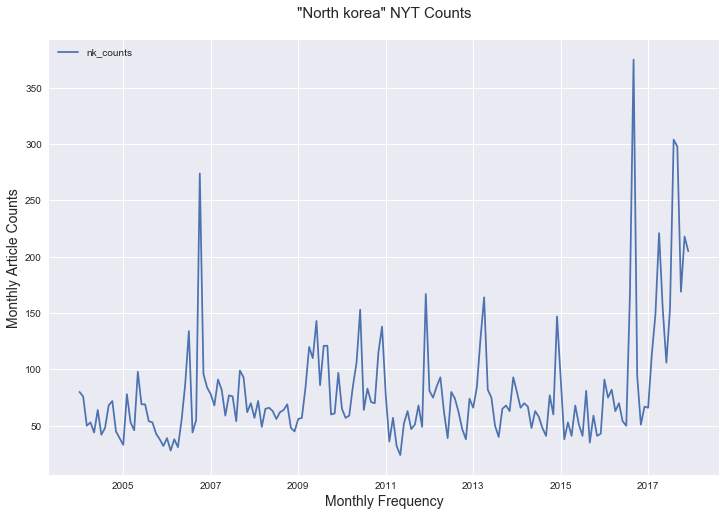

In [14]:
i = df_north_korea_counts

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('"North korea" NYT Counts\n', fontsize = 15)
ax.set_ylabel("Monthly Article Counts", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()


,kji_counts,kji_counts_qnt
month,,
2004-01-31,5,3qnt
2004-02-29,1,4qnt
2004-03-31,0,4qnt
2004-04-30,12,2qnt
2004-05-31,8,2qnt


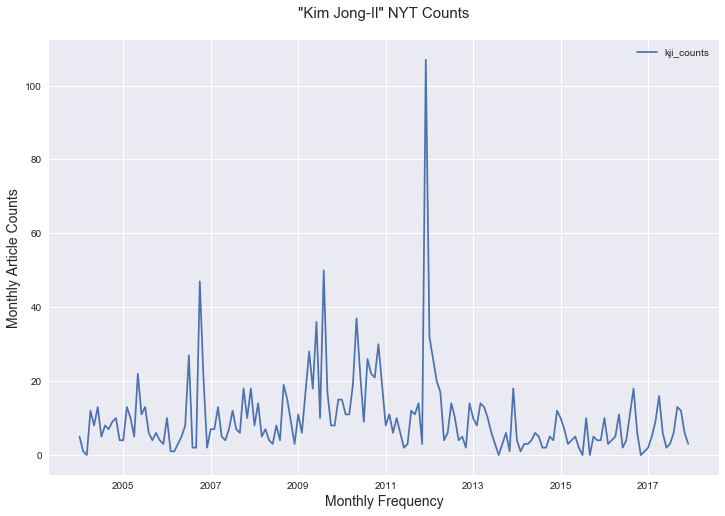

In [15]:
i = df_kim_jong_il_counts

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('"Kim Jong-Il" NYT Counts\n', fontsize = 15)
ax.set_ylabel("Monthly Article Counts", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

,kju_counts,kju_counts_qnt
month,,
2004-01-31,0,3qnt
2004-02-29,0,3qnt
2004-03-31,0,3qnt
2004-04-30,0,3qnt
2004-05-31,0,3qnt


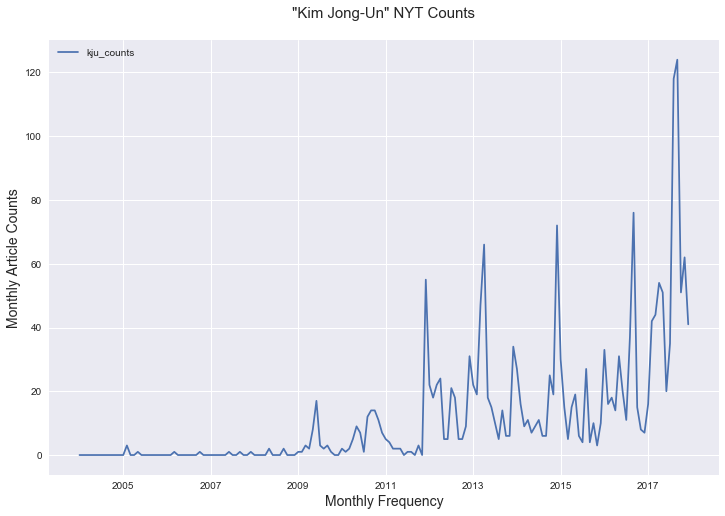

In [16]:
i = df_kim_jong_un_counts

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('"Kim Jong-Un" NYT Counts\n', fontsize = 15)
ax.set_ylabel("Monthly Article Counts", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

,nk_mis_counts,nk_mis_counts_qnt
month,,
2004-01-31,10,2qnt
2004-02-29,11,2qnt
2004-03-31,7,3qnt
2004-04-30,7,3qnt
2004-05-31,6,3qnt


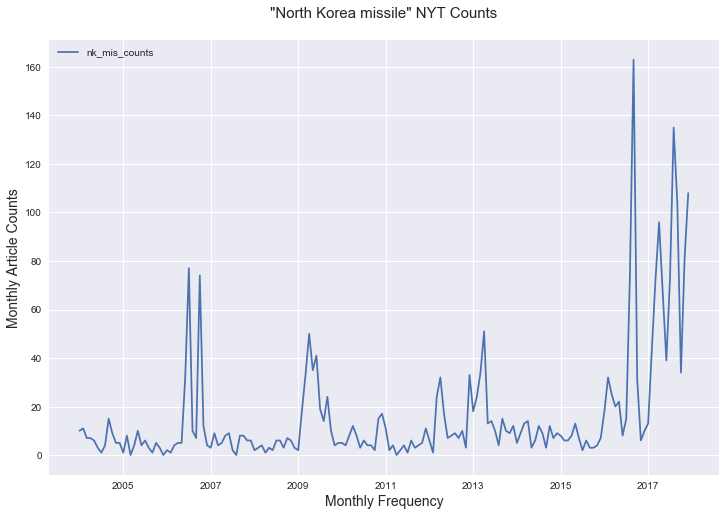

In [17]:
i = df_north_korea_missile_counts

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('"North Korea missile" NYT Counts\n', fontsize = 15)
ax.set_ylabel("Monthly Article Counts", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

,thaad_counts,thaad_counts_qnt
month,,
2004-01-31,0,2qnt
2004-02-29,0,2qnt
2004-03-31,0,2qnt
2004-04-30,0,2qnt
2004-05-31,0,2qnt


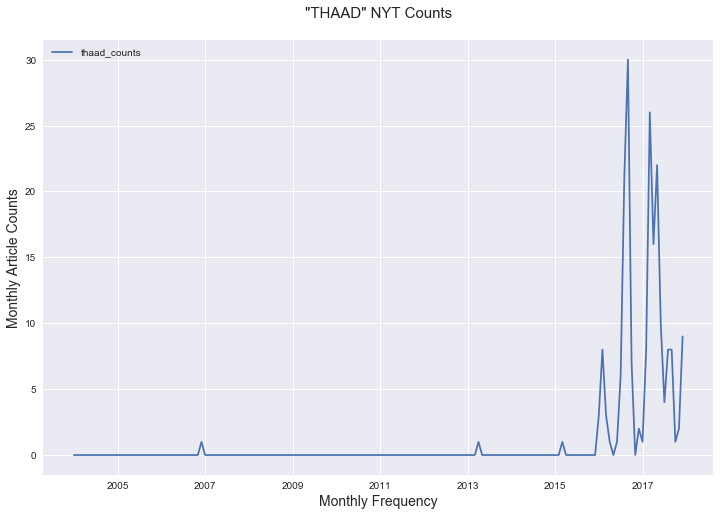

In [18]:
i = df_thaad_counts

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('"THAAD" NYT Counts\n', fontsize = 15)
ax.set_ylabel("Monthly Article Counts", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()


### Part III. Importing, Cleaning and Reporting of Data on the South Korean Financial Markets

The New York Times data was collected as we have been expecting. Now, let us fetch the South Korean financial market data.

All of the data have been collected from Bank of Korea Economic Statistics System. (http://ecos.bok.or.kr/)

The data have been downloaded as csv files, and uploaded on our github repository. Here, the raw data have not been touched at all, and they were uploaded straight to the github. The data cleaning process has been executed soley on this IPython notebook.

In [19]:
# Here, we fetch the csv files uploaded on the github repository. 
# (https://github.com/datasciencefun/data_bc_final_project/)

daily_rates = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/daily_rates.csv")

# The daily_rates represents the daily interest rates for 
# Overnight call rate: overnight interbank lending rate between Korean banks
# Gov bond (1yr), gov bond (3yr), gov bond (5yr): yields for Korean government bonds with maturities of 
# 1 year, 3 years and 5 years
# Corporate bond (AA-, 3yr), corporate bond (BBB-, 3yr): yields for corporate bond yields in Korea with credit
# ratings and maturities of AA-, 3 years and BBB-, 3 years respectively.
# The unit is in %.

kospi = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/kospi_monthly.csv")

# The kospi represents the KOSPI index, the equivalent of S&P 500 in the U.S. stock market.
# The numerical values in this dataset represnets the end of month level of the index in each month.
# The unit is in KOSPI index.

exchange_rates = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/exchange_rates_monthly.csv")

# The exchange rates represent the END OF MONTH exchange rates between KRW and other foreign currencies.
# In the dataset, we have Won to USD, Won to Euro and Won to 100 Yen.
# The units are in KRW (how much does the foreign currency worth in KRW).

fx_holdings = pd.read_csv("https://github.com/datasciencefun/data_bc_final_project/raw/master/fx_holdings_monthly.csv")

# The fx holdings represent Bank of Korea's foreign currency holdings in a given month.
# The unit is in KRW.



In [20]:
# Cleaning up the daily_rates 

i = daily_rates

i.columns = i.iloc[0] # Set the column name as the 0th row.
i = i.drop([0,1,2])   # Drop the rows that we don't need.
i = i.rename(columns = {"ItemNames1":"Date", '  Call Rate (Overnight-All Trades)':"overnight_call_rate", 
                        'Treasury Bonds (1-year)':"gov_bond_1yr",
       'Treasury Bonds (3-year)':"gov_bond_3yr", 'Treasury Bonds (5-year)':"gov_bond_5yr",
       'Treasury Bonds (10-year)':"gov_bond_10yr", 'Corporate Bonds (3-year, AA-)':"corp_bond_AAminus_3yr",
       'Corporate Bonds (3-year)(BBB-)':"corp_bond_BBBminus_3yr"}) # Reset the column names.
i = i.set_index("Date") # Set the Date as our index of the dataframe.

i.index = pd.to_datetime(i.index) # Convert the index to a pandas datetime index.

daily_rates = i

df_to_change = daily_rates
for i in df_to_change.columns:
    df_to_change[i] = df_to_change[i].str.replace(",", "").astype(float) 
    # Eliminate commas in the values and 
    # set them as floats.

daily_rates = daily_rates.resample("M").last() 
# Resample them in terms of a month, and get the last value 
# of the month.

monthly_rates = daily_rates

,overnight_call_rate,gov_bond_1yr,gov_bond_3yr,gov_bond_5yr,gov_bond_10yr,corp_bond_AAminus_3yr,corp_bond_BBBminus_3yr
Date,,,,,,,
2004-01-31,3.78,4.51,4.94,5.24,5.50,5.74,10.09
2004-02-29,3.78,4.40,4.78,5.08,5.43,5.56,10.03
2004-03-31,3.74,4.17,4.50,4.81,5.21,5.30,9.78
2004-04-30,3.76,4.07,4.43,4.82,5.18,5.14,9.61
2004-05-31,3.77,4.03,4.24,4.51,4.95,4.91,9.37


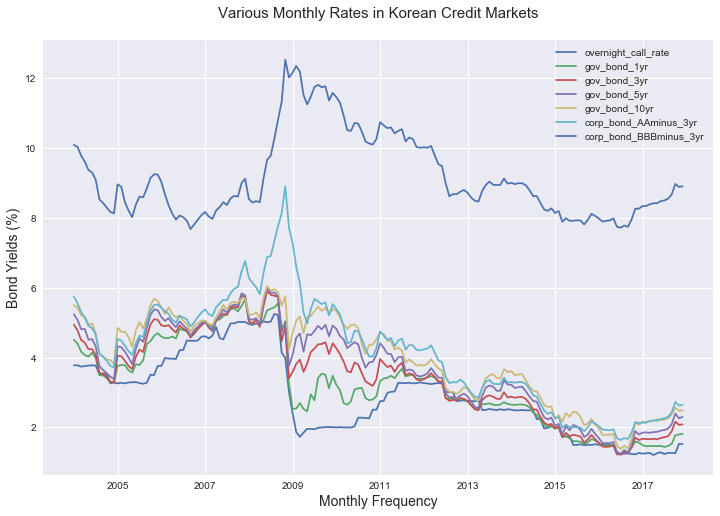

In [21]:
# Check how the data cleaning went by plotting them.

i = monthly_rates

#display(i.head())
#i.plot(title = 'Various Monthly Rates in Korean Credit Markets\n', figsize = (10,5))
#plt.show()

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Various Monthly Rates in Korean Credit Markets\n', fontsize = 15)
ax.set_ylabel("Bond Yields (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

In [22]:
# cleaning up the kospi data
# The same logic that we used for cleaning daily_rates is used in this process.

i = kospi

i.columns = i.iloc[0]
i = i.drop([0,1,2])
i = i.rename(columns = {"ItemNames1":"Date", '  KOSPI_Index(End Of)':"kospi"})
i = i.set_index("Date")

i.index = pd.to_datetime(i.index)
i.index = i.index + pd.offsets.MonthEnd(0)

kospi = i

# Now, let's change our data from objects to floats
df_to_change = kospi
for i in df_to_change.columns:
    df_to_change[i] = df_to_change[i].str.replace(",", "").astype(float)

,kospi
Date,
2004-01-31,848.50
2004-02-29,883.42
2004-03-31,880.50
2004-04-30,862.84
2004-05-31,803.84


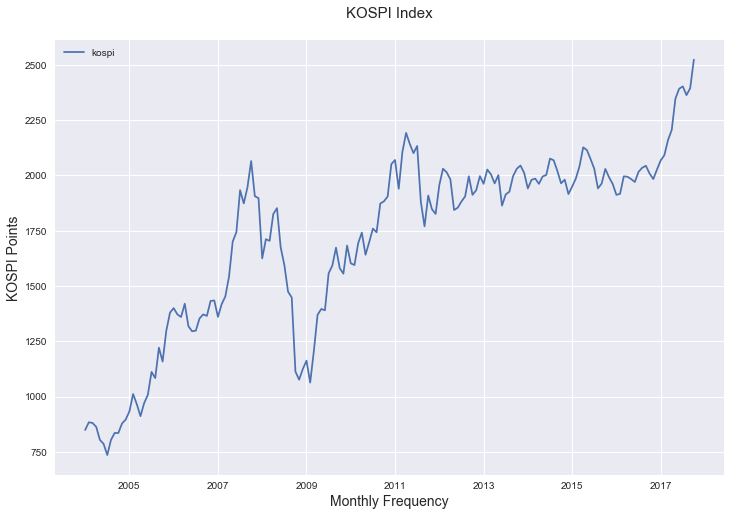

In [23]:
# Check how the data cleaning went by plotting them.

i = kospi

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('KOSPI Index\n', fontsize = 15)
ax.set_ylabel("KOSPI Points", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

In [24]:
# Cleaning up the exchange rates (end of month exchange rates).
# The same logic that we used for cleaning daily_rates is used in this process.

i = exchange_rates

i.columns = i.iloc[0]
i = i.drop([0,1,2,3])
i = i.rename(columns = {"ItemNames1":"Date", 'Won per United States Dollar(Basic Exchange Rate)':"won_to_usd",
       'Won per Japanese Yen(100Yen)':"won_to_100yen", 'Won per Euro':"won_to_euro"})
i = i.set_index("Date")

i.index = pd.to_datetime(i.index)
i.index = i.index + pd.offsets.MonthEnd(0)

exchange_rates = i

# Now, let's change our data from objects to floats
df_to_change = exchange_rates
for i in df_to_change.columns:
    df_to_change[i] = df_to_change[i].str.replace(",", "").astype(float)

,won_to_usd,won_to_100yen,won_to_euro
Date,,,
2004-01-31,1173.6,1107.85,1456.67
2004-02-29,1174.5,1072.46,1461.02
2004-03-31,1153.6,1090.00,1404.80
2004-04-30,1167.7,1062.08,1396.22
2004-05-31,1165.7,1056.17,1426.70


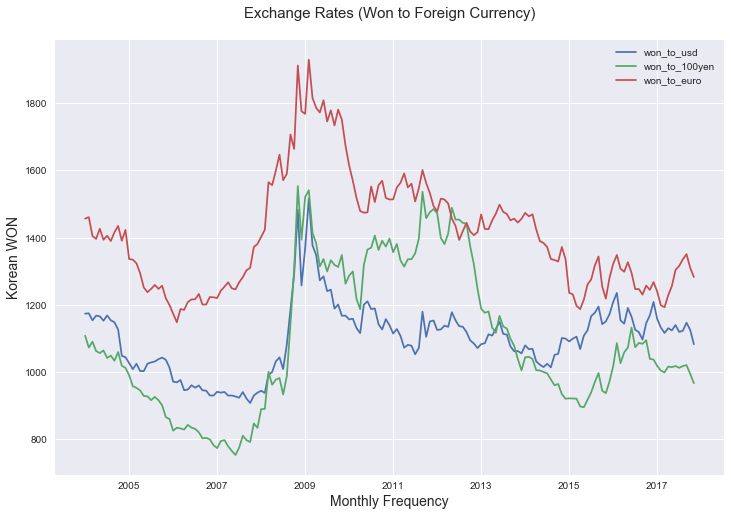

In [25]:
# Check how the data cleaning went by plotting them.

i = exchange_rates

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Exchange Rates (Won to Foreign Currency)\n', fontsize = 15)
ax.set_ylabel("Korean WON", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

In [26]:
# Cleaning up the foreign exchange holdings of Bank of Korea.
# The same logic that we used for cleaning daily_rates is used in this process.

i = fx_holdings

i.columns = i.iloc[0]
i = i.drop([0,1,2])
i = i.rename(columns = {"ItemNames1":"Date", '  Foreign Currency Reserves':"fx_holdings"})
i = i.set_index("Date")

i.index = pd.to_datetime(i.index)
i.index = i.index + pd.offsets.MonthEnd(0)

fx_holdings = i

# Now, let's change our data from objects to floats
df_to_change = fx_holdings
for i in df_to_change.columns:
    df_to_change[i] = df_to_change[i].str.replace(",", "").astype(float)

,fx_holdings
Date,
2004-01-31,156601527.0
2004-02-29,162160352.0
2004-03-31,162712852.0
2004-04-30,162808907.0
2004-05-31,165700235.0


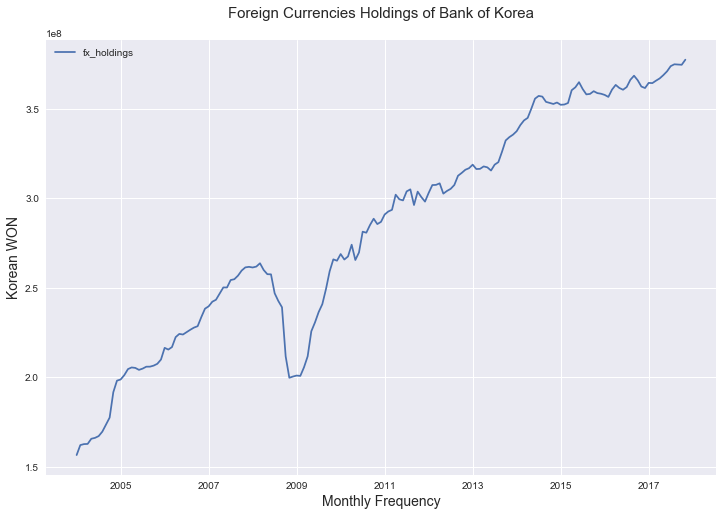

In [27]:
# Check how the data cleaning went by plotting them.

i = fx_holdings

display(i.head())

print("\n \n")

fig, ax = plt.subplots(figsize = (12,8))
i.plot(ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Foreign Currencies Holdings of Bank of Korea\n', fontsize = 15)
ax.set_ylabel("Korean WON", fontsize = 14,) # The y label
ax.set_xlabel("Monthly Frequency", fontsize = 14,) # the x label
ax.legend(frameon=False) # The legend, without a box...


plt.show()

### Part IV. Merging of New York Times Dataset and South Korean Market Dataset

In [28]:
# Here, we merge all the datasets that we have obtained above.
# This is easy due to our efforts in setting the index as the DateIndex.

merged1 = df_north_korea_counts.merge(df_kim_jong_il_counts, how="inner", left_index=True, right_index = True)
merged2 = merged1.merge(df_kim_jong_un_counts, how="inner", left_index=True, right_index = True)
merged3 = merged2.merge(df_north_korea_missile_counts, how="inner", left_index=True, right_index = True)
merged4 = merged3.merge(df_north_korea_nuclear_counts, how="inner", left_index=True, right_index = True)
merged5 = merged4.merge(df_thaad_counts, how="inner", left_index=True, right_index = True)

nyt_merged = merged5
# This merges all of our NYT datasets.

merged1 = monthly_rates.merge(kospi, how="inner", left_index=True, right_index = True)
merged2 = merged1.merge(exchange_rates, how="inner", left_index=True, right_index = True)
merged3 = merged2.merge(fx_holdings, how="inner", left_index=True, right_index = True)

k_market_merged = merged3
# This merges all of our Korean financial market datasets.

final_merged = nyt_merged.merge(k_market_merged, how="inner", left_index=True, right_index = True)
# This merges the NYT dataset with the Korean market dataset.


In [29]:
# Let us take a look at the result.

final_merged.head()

,nk_counts,nk_counts_qnt,kji_counts,kji_counts_qnt,kju_counts,kju_counts_qnt,nk_mis_counts,nk_mis_counts_qnt,nk_nuke_counts,nk_nuke_counts_qnt,...,gov_bond_3yr,gov_bond_5yr,gov_bond_10yr,corp_bond_AAminus_3yr,corp_bond_BBBminus_3yr,kospi,won_to_usd,won_to_100yen,won_to_euro,fx_holdings
2004-01-31,80,2qnt,5,3qnt,0,3qnt,10,2qnt,51,1qnt,...,4.94,5.24,5.50,5.74,10.09,848.50,1173.6,1107.85,1456.67,156601527.0
2004-02-29,76,2qnt,1,4qnt,0,3qnt,11,2qnt,62,1qnt,...,4.78,5.08,5.43,5.56,10.03,883.42,1174.5,1072.46,1461.02,162160352.0
2004-03-31,50,4qnt,0,4qnt,0,3qnt,7,3qnt,34,2qnt,...,4.50,4.81,5.21,5.30,9.78,880.50,1153.6,1090.00,1404.80,162712852.0
2004-04-30,53,3qnt,12,2qnt,0,3qnt,7,3qnt,30,2qnt,...,4.43,4.82,5.18,5.14,9.61,862.84,1167.7,1062.08,1396.22,162808907.0
2004-05-31,44,4qnt,8,2qnt,0,3qnt,6,3qnt,23,3qnt,...,4.24,4.51,4.95,4.91,9.37,803.84,1165.7,1056.17,1426.70,165700235.0


In [30]:
# Here, we slice our datasets according to the quantile each North Korean search term belongs to.
# Each of the code here separately contains only the rows that meets the quantile condition.

fm_nk_1qnt = final_merged.loc[final_merged["nk_counts_qnt"] == "1qnt"]
fm_nk_2qnt = final_merged.loc[final_merged["nk_counts_qnt"] == "2qnt"]
fm_nk_3qnt = final_merged.loc[final_merged["nk_counts_qnt"] == "3qnt"]
fm_nk_4qnt = final_merged.loc[final_merged["nk_counts_qnt"] == "4qnt"]

fm_kji_1qnt = final_merged.loc[final_merged["kji_counts_qnt"] == "1qnt"]
fm_kji_2qnt = final_merged.loc[final_merged["kji_counts_qnt"] == "2qnt"]
fm_kji_3qnt = final_merged.loc[final_merged["kji_counts_qnt"] == "3qnt"]
fm_kji_4qnt = final_merged.loc[final_merged["kji_counts_qnt"] == "4qnt"]

fm_kju_1qnt = final_merged.loc[final_merged["kju_counts_qnt"] == "1qnt"]
fm_kju_2qnt = final_merged.loc[final_merged["kju_counts_qnt"] == "2qnt"]
fm_kju_3qnt = final_merged.loc[final_merged["kju_counts_qnt"] == "3qnt"]
# Recall that kju_counts only had 3 quantiles.


fm_mis_1qnt = final_merged.loc[final_merged["nk_mis_counts_qnt"] == "1qnt"]
fm_mis_2qnt = final_merged.loc[final_merged["nk_mis_counts_qnt"] == "2qnt"]
fm_mis_3qnt = final_merged.loc[final_merged["nk_mis_counts_qnt"] == "3qnt"]
fm_mis_4qnt = final_merged.loc[final_merged["nk_mis_counts_qnt"] == "4qnt"]

fm_nuke_1qnt = final_merged.loc[final_merged["nk_nuke_counts_qnt"] == "1qnt"]
fm_nuke_2qnt = final_merged.loc[final_merged["nk_nuke_counts_qnt"] == "2qnt"]
fm_nuke_3qnt = final_merged.loc[final_merged["nk_nuke_counts_qnt"] == "3qnt"]
fm_nuke_4qnt = final_merged.loc[final_merged["nk_nuke_counts_qnt"] == "4qnt"]

fm_thaad_1qnt = final_merged.loc[final_merged["thaad_counts_qnt"] == "1qnt"]
fm_thaad_2qnt = final_merged.loc[final_merged["thaad_counts_qnt"] == "2qnt"]
# Recall that kju_counts only had 2 quantiles.

### Part V. Analysis Report - Analysis 1 (Stock Market), Analysis 2 (Credit Market), Analysis 3 (Currency Market), Analysis 4 (Time Series Analysis on Credit Market)

### Anaysis 1 - Impact of North Korean Events on the South Korean Stock Market

### 1-1) Impact of "North Korea" on the Korean stock market.

We divided up the periods from 2004 to 2017 into four quantiles, with the 4th quantile (4qnt) representing the period with the least count of articles about North Korea, and the 1st quantile (1qnt) being the period in which the number of articles most frequent. Our assumption is that the 4th quantile is the most peaceful time with lower North Korea threats and the 1st quantile the most turbulent time with the most North Korea threats. This is in consideration of the fact that everything North Korea ever does is threatening its neighbors with missile launches and nuclear tests.

Firstly, we executed the regression analysis where the dependent variables are 1 year Korean governemnt bond yield and its foreign reserves. This regression attempts to identify the relationship between KOSPI on 1 year South Korean government bond yield and Bank of Korea's foreign reserves holdings, without taking into account the North Korean effect. Here, we only look at the 4th quantile, where situation between North and South could be interpreted as being relatively peaceful.

The rationales for selecting 1 year government bond yield and the foreign reserves are as following. 

Return on investment in the government debt market partially constitutes the opportunity cost of investing in the stock market. The bond and stock markets are considered together when investors make decisions on their investment allocation, and the return from one market is bound to have impact on the other. We chose 1 year government bond, because they are shorter term bonds are typically more liquid and relatively easier to trade.

Next, the reason for using foreign reserves is due to the fact that the amount of foreign reserves that the government holds is a critical driver in the foreign currency markets, which affect the investment decisions of foreign investors. Huge fluctuations in the currency markets are undesirable for foreign investors in the Korean stock market, as they are exposed to the currency translation risks. Although Korean Won (the local currency) is a floating currency, Bank of Korea has intervened in the currency market to a certain degree to mitigate any large scale fluctuations. This is only executable when it holds enough foreign reserves. Thus, what happens to its foreign reserves has impact on the exchange rates, which in turn have impact on the stock market.


In [31]:
# Regression of the 4th quantile in terms of NYT North Korea counts.
# Here, we attempty to identify the relationship between the South Korean stock market (KOSPI), 
# and the North Korean events, specifically how sensitively the equity market reacts to North Korean events.

print('''
Figure 1-1. Regression of KOSPI against One Year Government Bond Yield and Foreign Reserves. (nk_counts = 4qnt)''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings)",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                          # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report



Figure 1-1. Regression of KOSPI against One Year Government Bond Yield and Foreign Reserves. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     405.9
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           7.84e-27
Time:                        19:47:23   Log-Likelihood:                -252.85
No. Observations:                  42   AIC:                             511.7
Df Residuals:                      39   BIC:                             516.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -3.85e+04   1888.083    -20.391      0.000   -4.23e+04   -3.47e+04
gov_bond_1yr          122.7317     23.070      5.320      0.000      76.069     169.395
np.log(fx_holdings)  2046.7859     94.308     21.703      0.000    1856.031    2237.541
==============================================================================
Omnibus:                        9.192   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.732
Skew:                           0.836   Prob(JB):                       0.0127
Kurtosis:                       4.482   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next, this is the relationship between KOSPI on 1 year South Korean government bond yield and Bank of Korea's foreign currency holdings, ADDING the impact of North Korean events into our analysis. Of course, we only look at the 4th quantile, where situation between North and South could be interpreted as being relatively peaceful.

In [32]:
print('''
Figure 1-2. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea" Article Counts. 
\n (nk_counts = 4qnt)''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure 1-2. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea" Article Counts. 

 (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     317.5
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           6.12e-27
Time:                        19:47:25   Log-Likelihood:                -249.11
No. Observations:                  42   AIC:                             506.2
Df Residuals:                      38   BIC:                             513.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.762e+04   1779.347    -21.144      0.000   -4.12e+04    -3.4e+04
gov_bond_1yr          108.8861     21.978      4.954      0.000      64.393     153.379
np.log(fx_holdings)  2017.3059     88.073     22.905      0.000    1839.011    2195.601
nk_counts              -6.2130      2.283     -2.721      0.010     -10.835      -1.591
==============================================================================
Omnibus:                        3.101   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.958
Skew:                           0.418   Prob(JB):                        0.376
Kurtosis:                       3.647   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, let us look at how the regression unfolds when nk_counts = 1qnt.

In [33]:
print('''
Figure 1-3. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves. (nk_counts = 1qnt)''')


results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings)",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 1-4. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea" Article Counts. 
\n (nk_counts = 1qnt)''')


results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure 1-3. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     91.76
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           7.36e-15
Time:                        19:47:26   Log-Likelihood:                -250.63
No. Observations:                  39   AIC:                             507.3
Df Residuals:                      36   BIC:                             512.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.629e+04   3935.380     -9.223      0.000   -4.43e+04   -2.83e+04
gov_bond_1yr           62.5814     32.288      1.938      0.060      -2.902     128.065
np.log(fx_holdings)  1947.2779    198.156      9.827      0.000    1545.399    2349.156
==============================================================================
Omnibus:                        4.398   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                1.832
Skew:                           0.110   Prob(JB):                        0.400
Kurtosis:                       1.961   Cond. No.                     3.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


 


Figure 1-4. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea" Article Counts. 

 (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     59.62
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           7.77e-14
Time:                        19:47:26   Log-Likelihood:                -250.59
No. Observations:                  39   AIC:                             509.2
Df Residuals:                      35   BIC:                             515.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.614e+04   4026.479     -8.976      0.000   -4.43e+04    -2.8e+04
gov_bond_1yr           63.5104     32.896      1.931      0.062      -3.272     130.293
np.log(fx_holdings)  1938.6186    203.346      9.534      0.000    1525.805    2351.432
nk_counts               0.1108      0.414      0.268      0.790      -0.729       0.950
==============================================================================
Omnibus:                        4.540   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                1.878
Skew:                           0.126   Prob(JB):                        0.391
Kurtosis:                       1.955   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Output Analysis and Interpretation

Here, we find that

- Data on 4th quantile (peaceful time) indicates that the impact of North Korean events is statistically significant as p value is lower than 0.05. (Figure. 1-2)
- One additional NYT article about North Korea led to **6.2130 points drop** in Korean stock market. (Figure. 1-2)
- Adding the North Korea article counts increased the R-Squared by approximately 1%. (Incremental R-Squared between Figure. 1-1 and Figure. 1-2)
- Data on 1st quantile indicates that North Korean events were not a statistically significant independent variable that explains the stock market. (Figure. 1-3 and Figure. 1-4) 
- The reason for such difference could arise from the fact that the market has already priced in the North Korean risks during the 4th quantile. The market would swiftly reflect the North Korean events as tensions are spotted during the relatively quiet period (4qnt), so there is no more corrections to be made when tensions are at the peak (1qnt). 

### 1-2) The most influential North Korean event keyword that affects the South Korean stock market.

Here, we will attempt to identify the most influential keyword that affects the South Korean stock market. The "most influential keyword" is defined as the word that is statistically significant and has the most negative regression coefficient. This is due to the fact that the North Korean events has negative impact on the stock market's performance.

Upon executing multiple regressions with different North Korean independent variable, we were able to identify "North Korea missile" as the most influential North Korean keyword, and following is the regression output.

In [34]:
print('''Figure 1-5. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea Missile" Article Counts.
\n (nk_counts = 4qnt)''')


results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + nk_mis_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_mis_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

Figure 1-5. Regression of KOSPI against One Year Government Bond Yield, Foreign Reserves, and "North Korea Missile" Article Counts.

 (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     157.1
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           1.69e-24
Time:                        19:47:27   Log-Likelihood:                -317.89
No. Observations:                  51   AIC:                             643.8
Df Residuals:                      47   BIC:                             651.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.939e+04   2021.215    -19.488      0.000   -4.35e+04   -3.53e+04
gov_bond_1yr           89.9011     20.114      4.470      0.000      49.438     130.364
np.log(fx_holdings)  2103.9130    102.400     20.546      0.000    1897.911    2309.915
nk_mis_counts         -29.9995     14.545     -2.063      0.045     -59.260      -0.739
==============================================================================
Omnibus:                        1.201   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.088
Skew:                           0.179   Prob(JB):                        0.580
Kurtosis:                       2.380   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Output Analysis and Interpretation

Here, we find that

- The most influential keyword with statistical significance turned out to be "North Korea missile", which led to **29.9995 points drop** in the KOSPI. (Figure. 1-5)
- The rest of the keywords, such as Kim Jung-Il (the previous North Korea leader), Kim Jong-Un (the current North Korea leader), North Korea nuclear, or THAAD either had smaller regression coefficient than "North Korea missile", or had statistically insignificant regression output. (APPENDIX)

### Anaysis 2 - Impact of North Korean Events on the South Korean Credit Market: Government and Corporate Bond Yields

### 1. Relationship between Korean government bonds and North Korean events

Here, we will attempt to identify the relationship between the Korean government bond yields and the North Korean events.

We will conduct regression between the governemt bond yields (1 year and 10 years maturities) on the NYT North Korean event counts. Please note that the unit of the bond yields in our dataset is in %. We have divided the dataset in a same way that we did for the stock markets, into 1st through 4th quantiles.

Firstly, we regress the NYT North Korea counts against the one year maturity Korean government bond yield, on the 4th and 1st quantile individually.

In [35]:
print('''
Figure 2-1. Regression of One Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 4qnt)''')


results = smf.ols("gov_bond_1yr ~  nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 2-2. Regression of One Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 1qnt)''')

results = smf.ols("gov_bond_1yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report



Figure 2-1. Regression of One Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gov_bond_1yr   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.003
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.165
Time:                        19:47:30   Log-Likelihood:                -62.651
No. Observations:                  42   AIC:                             129.3
Df Residuals:                      40   BIC:                             132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7617      1.081      4.404      0.000       2.576       6.947
nk_counts     -0.0360      0.025     -1.415      0.165      -0.087       0.015
==============================================================================
Omnibus:                        3.487   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.680
Skew:                          -0.115   Prob(JB):                        0.432
Kurtosis:                       2.047   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 2-2. Regression of One Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gov_bond_1yr   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.075
Date:                Thu, 21 Dec 2017   Prob (F-statistic):             0.0303
Time:                        19:47:30   Log-Likelihood:                -61.407
No. Observations:                  39   AIC:                             126.8
Df Residuals:                      37   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7238      0.457      8.140      0.000       2.797       4.651
nk_counts     -0.0066      0.003     -2.253      0.030      -0.012      -0.001
==============================================================================
Omnibus:                        3.141   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.902
Skew:                           0.640   Prob(JB):                        0.234
Kurtosis:                       2.619   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 2-2.

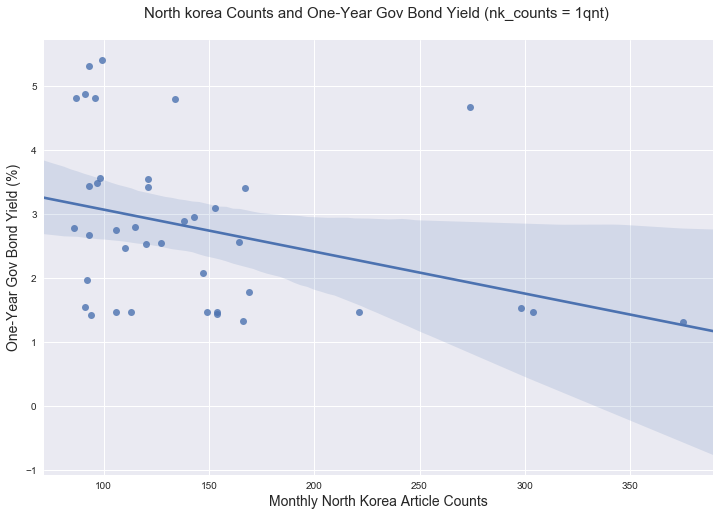

In [36]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_1yr', data=fm_nk_1qnt)

ax.set_title('North korea Counts and One-Year Gov Bond Yield (nk_counts = 1qnt) \n', fontsize = 15)
ax.set_ylabel("One-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the xlabel

plt.show()

Next, we regress the NYT North Korea counts against the ten-year Korean government bond yield, on the 4th and 1st quantile individually. Please note that the unit of the bond yields in our dataset is in % as well.

In [37]:
print('''
Figure 2-3. Regression of Ten Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 4qnt)''')

results = smf.ols("gov_bond_10yr ~  nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 2-4. Regression of Ten Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 1qnt)''')

results = smf.ols("gov_bond_10yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report



Figure 2-3. Regression of Ten Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gov_bond_10yr   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.987
Date:                Thu, 21 Dec 2017   Prob (F-statistic):             0.0917
Time:                        19:47:33   Log-Likelihood:                -66.078
No. Observations:                  42   AIC:                             136.2
Df Residuals:                      40   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9287      1.173      5.054      0.000       3.558       8.300
nk_counts     -0.0477      0.028     -1.728      0.092      -0.103       0.008
==============================================================================
Omnibus:                        4.317   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                1.990
Skew:                          -0.195   Prob(JB):                        0.370
Kurtosis:                       2.007   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 2-4. Regression of Ten Year Government Bond Yield against "North Korea" Article Counts. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gov_bond_10yr   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.497
Date:                Thu, 21 Dec 2017   Prob (F-statistic):            0.00945
Time:                        19:47:33   Log-Likelihood:                -65.227
No. Observations:                  39   AIC:                             134.5
Df Residuals:                      37   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9574      0.505      9.825      0.000       3.935       5.980
nk_counts     -0.0088      0.003     -2.738      0.009      -0.015      -0.002
==============================================================================
Omnibus:                        7.791   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                2.655
Skew:                          -0.254   Prob(JB):                        0.265
Kurtosis:                       1.827   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 2-4.

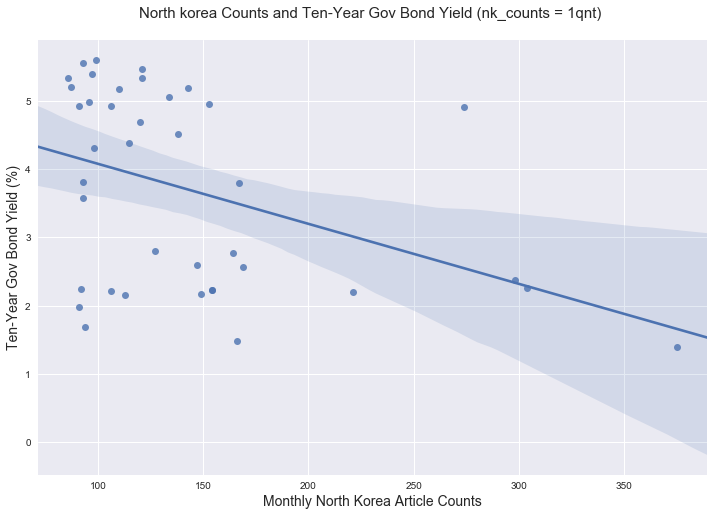

In [38]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_10yr', data=fm_nk_1qnt)

ax.set_title('North korea Counts and Ten-Year Gov Bond Yield (nk_counts = 1qnt) \n', fontsize = 15)
ax.set_ylabel("Ten-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

### Output Analysis and Interpretation

Here, we find that

- As opposed to the stock market, where North Korean events had statistical significance during relatively peaceful period (nk_counts = 4qnt), **the government bond market indicates that they were statistically significant during relatively turbulent period (nk_counts = 1qnt), in both one-year and ten-year government bond markets.** (Figure. 2-1 vs Figure. 2-2 and Figure. 2-3 vs Figure. 2-4)
- In both the one-year and ten-year government bond markets, R-Squared were higher during turbulent period by approximately 10%. (Figure. 2-1 vs Figure. 2-2 and Figure. 2-3 vs Figure. 2-4)
- In one-year government bonds, one additional North Korea article led to **0.66 bps decline** in the yields. (Figure. 2-2)
- In ten-year government bonds, one additional North Korea article led to **0.88 bps decline** in the yields. (Figure. 2-4)
- The decrease in the government bond yields, or increase in bond prices indicates increase in demand for the bonds. Such trend has to be taken into account in conjunction with the stock market movements. The North Korean article counts led to decrease in the stock market index, and increase in the government bond prices. Our interpretation of this is that the market moves towards a relatively safer bond markets when the tension rises. The market would pull out of the stock market when the North Korean risks begin to rise (4qnt), and reallocate towards the bond market as they get tougher (1qnt).
- The bond yields falling, instead of rising during the tense period (1qnt) could be interpreted as the **risks of a total war being minimal.** If the markets anticipated such a full-blown war between South and North, the yields should have risen as the default risk will rise.
- Combining the stock market and bond market data, we observe that the North Korean risks materialize themselves as reallocation towards the government issued fixed-income securities from the equities.


### 2. Relationship between Korean investment-grade corporate bonds (credit rating of AA-) and North Korean events.

Next, we attempt to see if the corporate bonds market will tell us a consistent story about the North Korean risks, and have conducted regression on the investment-grade corporate bond (credit rating of AA-) yields against the "North Korea" article counts. Figure 2-5 represents regression during 4th quantile (relatively peaceful) period, and figure 2-6 the 1st quantile (relatively tense) period.

In [39]:
print('''
Figure 2-5. Regression of Three Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (nk_counts = 4qnt)''')

results = smf.ols("corp_bond_AAminus_3yr ~  nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 2-6. Regression of Three Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (nk_counts = 1qnt)''')

results = smf.ols("corp_bond_AAminus_3yr ~  nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report




Figure 2-5. Regression of Three Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     corp_bond_AAminus_3yr   R-squared:                       0.011
Model:                               OLS   Adj. R-squared:                 -0.014
Method:                    Least Squares   F-statistic:                    0.4429
Date:                   Thu, 21 Dec 2017   Prob (F-statistic):              0.510
Time:                           19:47:35   Log-Likelihood:                -77.722
No. Observations:                     42   AIC:                             159.4
Df Residuals:                         40   BIC:                             162.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0882      1.548      3.287      0.002       1.960       8.217
nk_counts     -0.0242      0.036     -0.665      0.510      -0.098       0.049
==============================================================================
Omnibus:                        8.118   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.194
Skew:                           0.793   Prob(JB):                       0.0274
Kurtosis:                       4.263   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 2-6. Regression of Three Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     corp_bond_AAminus_3yr   R-squared:                       0.153
Model:                               OLS   Adj. R-squared:                  0.130
Method:                    Least Squares   F-statistic:                     6.691
Date:                   Thu, 21 Dec 2017   Prob (F-statistic):             0.0138
Time:                           19:47:35   Log-Likelihood:                -66.650
No. Observations:                     39   AIC:                             137.3
Df Residuals:                         37   BIC:                             140.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0058      0.523      9.566      0.000       3.945       6.066
nk_counts     -0.0086      0.003     -2.587      0.014      -0.015      -0.002
==============================================================================
Omnibus:                       10.288   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.712
Skew:                          -0.141   Prob(JB):                        0.258
Kurtosis:                       1.739   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 2-6.

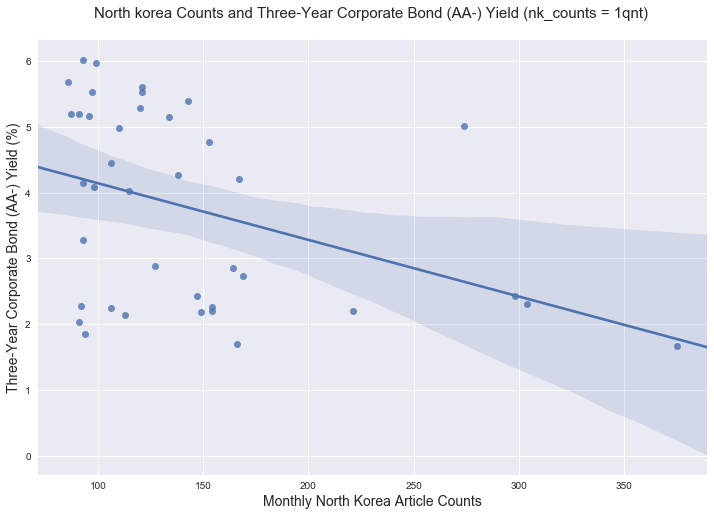

In [40]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='corp_bond_AAminus_3yr', data=fm_nk_1qnt)

ax.set_title('North korea Counts and Three-Year Corporate Bond (AA-) Yield (nk_counts = 1qnt) \n', fontsize = 15)
ax.set_ylabel("Three-Year Corporate Bond (AA-) Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

### Output Analysis and Interpretation

Here, we find that

- The same consistent observation is made in the Korean investment-grade (AA- credit rating) corporate bond markets as in the government bond market.
- As in the government bond market, the North Korean events had statistical significance during turbulent period, and led to decrease in the yields or increase in bond prices.
- Regression coefficient of -0.0086 indicates that an additional North Korea article led to **0.86 bps decline** decrease in the corporate bond yields. (Figure. 2-6)
- Combining Figure. 2-1 through Figure. 2-6, the Korean government bonds and corporate bonds are telling us a consistent story about how the North Korean events affect the market, that a total war is unlikely, but the risks guided the investors towards bonds as can be observed by statistically significant negative coefficients.

### Anaysis 3 - Impact of North Korean Events on the South Korean Foreign Currency Market

### Relationship between WON / USD (Won per $1) to North Korean Events 

Here, we attempt to identify the relationship between the "North Korea" article counts and Korean Won to US Dollar exchange rates. The Won to USD exchange rates represent the end of month data. The reason for choosing end of month rates, rather than the average is to better capture the market movement trigerred by any North Korean events. Using the average number will blend the rates data, failing to capture meaningful movements. For instance, assume that a North Korean event took place on the 28th of December. Taking average number only caputres 4 days (28th, 29th, 30th and 31th) worth of currency movements triggered by North Korea, having 27 days worth of currency movements that have nothing to do with the event. On the other hand, the end of month exchange rates will be fully reflecting the market's assessment of the incident. 

In [41]:
print('''
Figure 3-1. Regression of Won/USD Exchange Rate against "North Korea" Article Counts. (nk_counts = 4qnt)''')

results = smf.ols("won_to_usd ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 3-2. Regression of Won/USD Exchange Rate against "North Korea" Article Counts. (nk_counts = 1qnt)''')


results = smf.ols("won_to_usd ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure 3-1. Regression of Won/USD Exchange Rate against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             won_to_usd   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     5.246
Date:                Thu, 21 Dec 2017   Prob (F-statistic):             0.0273
Time:                        19:47:39   Log-Likelihood:                -248.56
No. Observations:                  42   AIC:                             501.1
Df Residuals:                      40   BIC:                             504.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    890.7331     90.421      9.851      0.000     707.985    1073.481
nk_counts      4.8726      2.127      2.290      0.027       0.573       9.172
==============================================================================
Omnibus:                       21.126   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.276
Skew:                           1.326   Prob(JB):                     2.96e-09
Kurtosis:                       6.926   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 3-2. Regression of Won/USD Exchange Rate against "North Korea" Article Counts. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             won_to_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                 0.0006852
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.979
Time:                        19:47:39   Log-Likelihood:                -236.56
No. Observations:                  39   AIC:                             477.1
Df Residuals:                      37   BIC:                             480.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1114.1380     40.818     27.295      0.000    1031.433    1196.843
nk_counts      0.0068      0.260      0.026      0.979      -0.520       0.533
==============================================================================
Omnibus:                        0.813   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.702
Skew:                          -0.312   Prob(JB):                        0.704
Kurtosis:                       2.791   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 3-1.

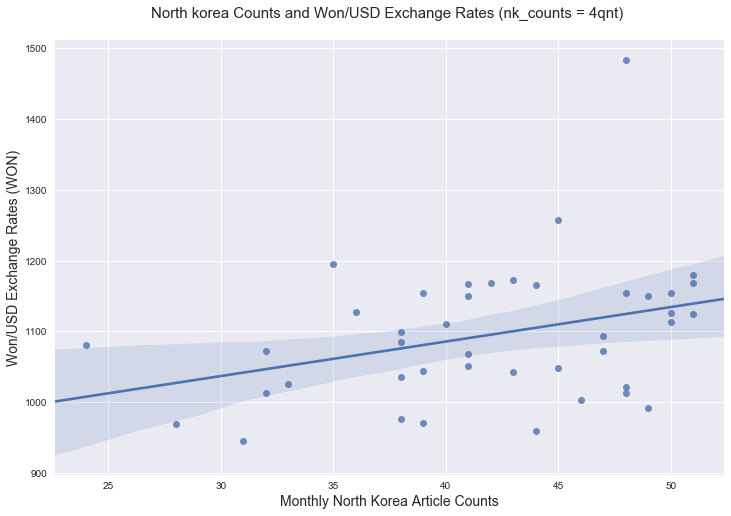

In [42]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='won_to_usd', data=fm_nk_4qnt)

ax.set_title('North korea Counts and Won/USD Exchange Rates (nk_counts = 4qnt) \n', fontsize = 15)
ax.set_ylabel("Won/USD Exchange Rates (WON)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

### Output Analysis and Interpretation

Here, we find that

- The WON/USD currency market reacts to the North Korean events in a similar way that the stock market does. That is, it reacts swiftly to the North Korean events during the 4th quantile. The regressions indicates no statistical significance during the 1st quantile. (Figure. 3-1 and Figure. 3-2)
- In the 4th quantile, the North Korean article counts accounted for 11.6% of the WON/USD exchange rates. (Figure. 3-1)
- In the 4th quantile, one additional North Korea article **increased the WON/USD by 4.8726.** This means North Korean events make Korean Won less valuable and US dollar relatively more valuable. (Figure. 3-1)
- This is the story that we have seen in the stock market where the market reacted to the North Korean events during the 4th quantile and not in the 1st quantile. We suspect the same rationale for such observation, that the currency market swiftly prices in the North Korean risks during the initial stage that the tension begins to rise(4th quantile), so that there is nothing more to reflect when the tension has reached the top (1st quantile).
- There was no statistical significance between Won/Euro or Won/100Yen against North Korea article counts. (APPENDIX)

### Analysis 4 - Time Series Analysis: Credit Market

Here, we will attempt to analyze how the market reactions have changed, between period 1 (2004 ~ 2010) and period 2 (2011 ~ 2017). We are particularly interested in how the bond market has played out between the two periods. Please note that 2011 is the half point in our time series, and also the year of leadership change from Kim Jong-Il to Kim Jong-Un (December of 2011).

We will execute regression of one-year, ten-year government bond and investment-grade corporate bond (AA-) yields against the North Korea article counts during the aforementioned two separate periods.

In [43]:
# Here, we divide our final_merged dataframe into two different timelines.

final_merged_2004_2010 = final_merged["2004":"2010"] # Period 1 (2004 ~ 2010)

final_merged_2011_2017 = final_merged["2011":"2017"] # Period 1 (2011 ~ 2017)

In [44]:
print('''Figure 4-1. Regression of One-Year Government Bond Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)''')

results = smf.ols("gov_bond_1yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=final_merged_2004_2010).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


print("\n \n")

print('''
Figure 4-2. Regression of One-Year Government Bond Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)''')

results = smf.ols("gov_bond_1yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=final_merged_2011_2017).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

Figure 4-1. Regression of One-Year Government Bond Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gov_bond_1yr   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.239
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.138
Time:                        19:47:43   Log-Likelihood:                -112.11
No. Observations:                  84   AIC:                             228.2
Df Residuals:                      82   BIC:                             233.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4157      0.237     18.652      0.000       3.945       4.887
nk_counts     -0.0044      0.003     -1.496      0.138      -0.010       0.001
==============================================================================
Omnibus:                       37.347   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.782
Skew:                          -0.059   Prob(JB):                       0.0555
Kurtosis:                       1.720   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 4-2. Regression of One-Year Government Bond Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gov_bond_1yr   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     10.23
Date:                Thu, 21 Dec 2017   Prob (F-statistic):            0.00198
Time:                        19:47:43   Log-Likelihood:                -88.996
No. Observations:                  82   AIC:                             182.0
Df Residuals:                      80   BIC:                             186.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7034      0.138     19.578      0.000       2.429       2.978
nk_counts     -0.0042      0.001     -3.199      0.002      -0.007      -0.002
==============================================================================
Omnibus:                       26.047   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.063
Skew:                           0.071   Prob(JB):                       0.0795
Kurtosis:                       1.791   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 4-1.

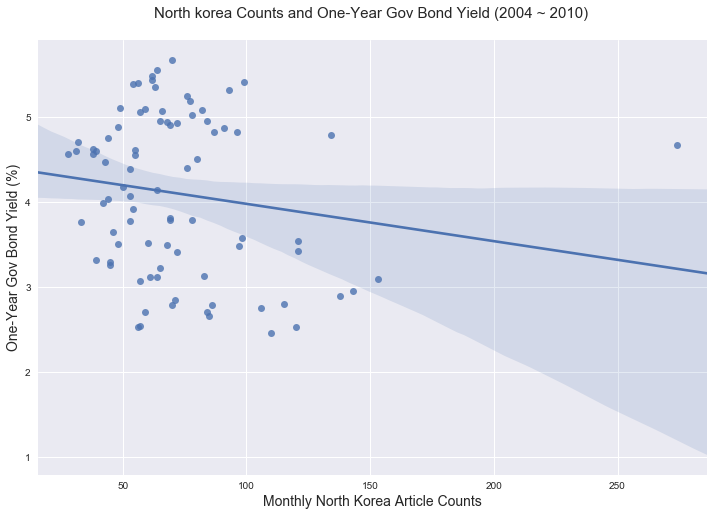

In [45]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_1yr', data=final_merged_2004_2010)

ax.set_title('North korea Counts and One-Year Gov Bond Yield (2004 ~ 2010) \n', fontsize = 15)
ax.set_ylabel("One-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

Visualization of Figure 4-2.

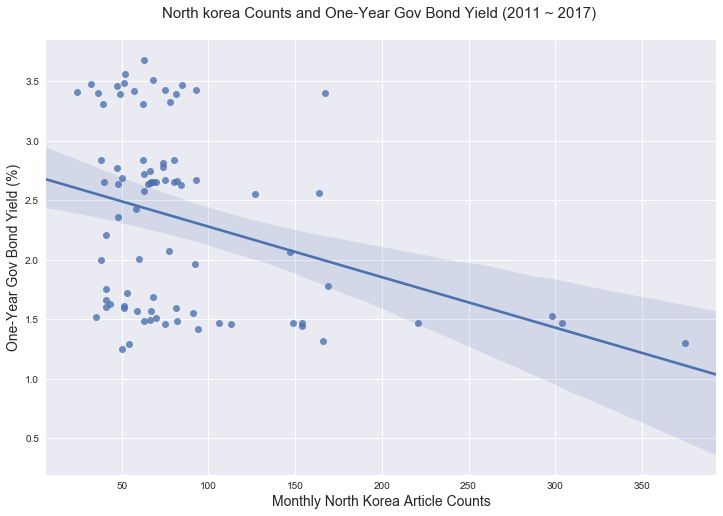

In [46]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_1yr', data=final_merged_2011_2017)

ax.set_title('North korea Counts and One-Year Gov Bond Yield (2011 ~ 2017) \n', fontsize = 15)
ax.set_ylabel("One-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the xlabel

plt.show()

In [47]:
print('''
Figure 4-3. Regression of Ten-Year Government Bond Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)''')

results = smf.ols("gov_bond_10yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=final_merged_2004_2010).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


print("\n \n")


print('''
Figure 4-4. Regression of Ten-Year Government Bond Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)''')

results = smf.ols("gov_bond_10yr ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=final_merged_2011_2017).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure 4-3. Regression of Ten-Year Government Bond Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gov_bond_10yr   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2882
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.593
Time:                        19:47:47   Log-Likelihood:                -58.720
No. Observations:                  84   AIC:                             121.4
Df Residuals:                      82   BIC:                             126.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1337      0.125     40.946      0.000       4.884       5.383
nk_counts     -0.0008      0.002     -0.537      0.593      -0.004       0.002
==============================================================================
Omnibus:                        5.422   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.027
Skew:                          -0.596   Prob(JB):                       0.0810
Kurtosis:                       3.117   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 4-4. Regression of Ten-Year Government Bond Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gov_bond_10yr   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.455
Date:                Thu, 21 Dec 2017   Prob (F-statistic):            0.00288
Time:                        19:47:47   Log-Likelihood:                -97.247
No. Observations:                  82   AIC:                             198.5
Df Residuals:                      80   BIC:                             203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2908      0.153     21.551      0.000       2.987       3.595
nk_counts     -0.0045      0.001     -3.075      0.003      -0.007      -0.002
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.184
Skew:                           0.031   Prob(JB):                        0.336
Kurtosis:                       2.203   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 4-3.

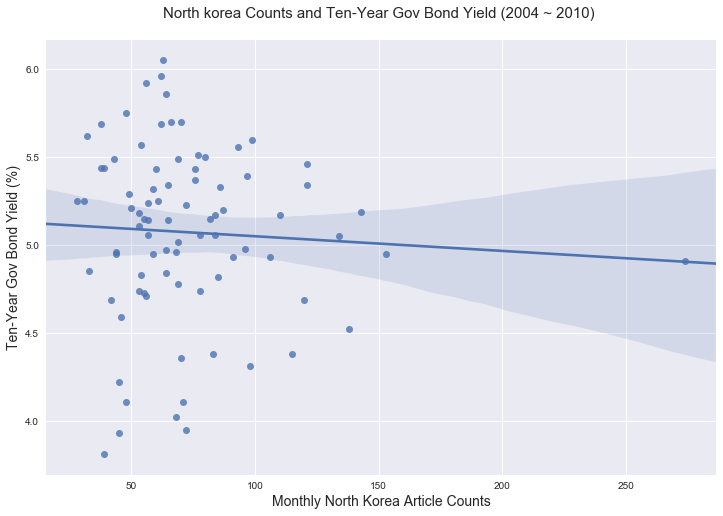

In [48]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_10yr', data=final_merged_2004_2010)

ax.set_title('North korea Counts and Ten-Year Gov Bond Yield (2004 ~ 2010) \n', fontsize = 15)
ax.set_ylabel("Ten-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

Visualization of Figure 4-4.

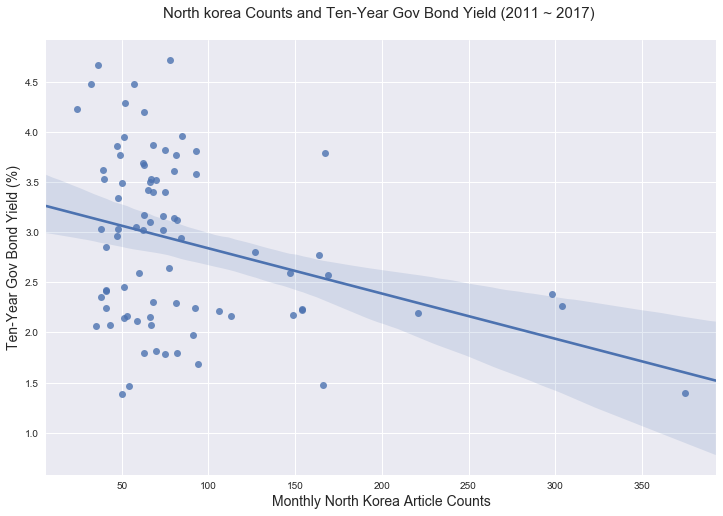

In [49]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_10yr', data=final_merged_2011_2017)

ax.set_title('North korea Counts and Ten-Year Gov Bond Yield (2011 ~ 2017) \n', fontsize = 15)
ax.set_ylabel("Ten-Year Gov Bond Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the xlabel

plt.show()

In [50]:
print('''Figure 4-5. Regression of Three-Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)''')

results = smf.ols("corp_bond_AAminus_3yr ~ nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=final_merged_2004_2010).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

print("\n \n")

print('''
Figure 4-6. Regression of Three-Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)''')

results = smf.ols("corp_bond_AAminus_3yr ~ nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=final_merged_2011_2017).fit()  
                                        # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure 4-5. Regression of Three-Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (Period 1, 2004 ~ 2010)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     corp_bond_AAminus_3yr   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     1.047
Date:                   Thu, 21 Dec 2017   Prob (F-statistic):              0.309
Time:                           19:47:52   Log-Likelihood:                -118.62
No. Observations:                     84   AIC:                             241.2
Df Residuals:                         82   BIC:                             246.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6114      0.256     21.937      0.000       5.103       6.120
nk_counts     -0.0032      0.003     -1.023      0.309      -0.010       0.003
==============================================================================
Omnibus:                       15.727   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.465
Skew:                           0.951   Prob(JB):                     9.78e-05
Kurtosis:                       4.287   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 


Figure 4-6. Regression of Three-Year Corporate Bond (AA-) Yield against "North Korea" Article Counts. (Period 2, 2011 ~ 2017)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     corp_bond_AAminus_3yr   R-squared:                       0.072
Model:                               OLS   Adj. R-squared:                  0.060
Method:                    Least Squares   F-statistic:                     6.203
Date:                   Thu, 21 Dec 2017   Prob (F-statistic):             0.0148
Time:                           19:47:52   Log-Likelihood:                -104.86
No. Observations:                     82   AIC:                             213.7
Df Residuals:                         80   BIC:                             218.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2862      0.168     19.612      0.000       2.953       3.620
nk_counts     -0.0040      0.002     -2.491      0.015      -0.007      -0.001
==============================================================================
Omnibus:                       11.359   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.378
Skew:                           0.275   Prob(JB):                        0.112
Kurtosis:                       2.011   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization of Figure 4-5.

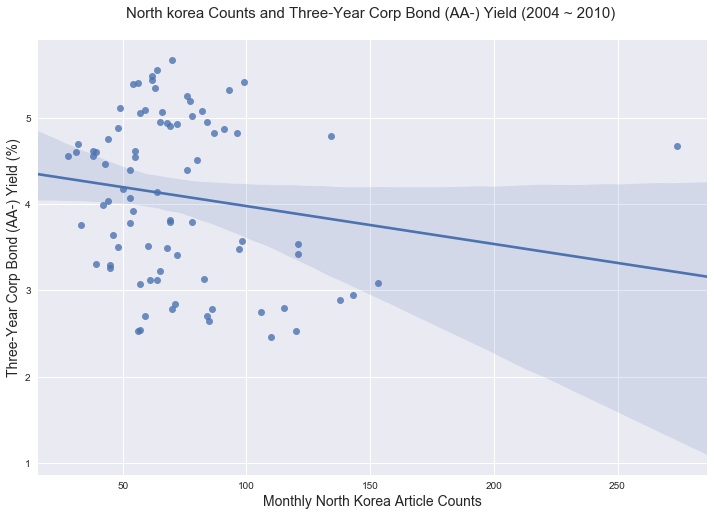

In [51]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_1yr', data=final_merged_2004_2010)

ax.set_title('North korea Counts and Three-Year Corp Bond (AA-) Yield (2004 ~ 2010) \n', fontsize = 15)
ax.set_ylabel("Three-Year Corp Bond (AA-) Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

Visualization of Figure 4-6.

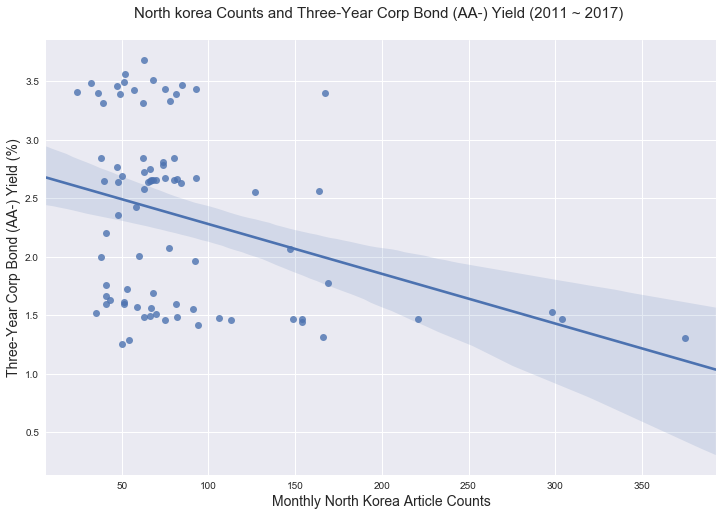

In [52]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x='nk_counts', y='gov_bond_1yr', data=final_merged_2011_2017)

ax.set_title('North korea Counts and Three-Year Corp Bond (AA-) Yield (2011 ~ 2017) \n', fontsize = 15)
ax.set_ylabel("Three-Year Corp Bond (AA-) Yield (%)", fontsize = 14,) # The y label
ax.set_xlabel("Monthly North Korea Article Counts", fontsize = 14,) # the x label

plt.show()

### Output Analysis and Interpretation

Here, we find that

- All of the three regression analysis are telling us a consistent story.
- Consistently, the bond markets indicated statistical significance of North Korea article counts in explaining the yield movements during the period 2 (2011 ~ 2017), but not in the period 1 (2004 ~ 2010). 
- During the period 2 (2011 ~ 2017), the article counts could explain the bond yield movements by 7% to 10%. (R-Squred in Figure. 4-2, Figure. 4-4 and Figure. 4-6)
- During the period 2 (2011 ~ 2017), the regression coefficient was negative, consistent with our analysis and interpretation of the result in Anaysis 2 - Impact of North Korean Events on the South Korean Credit Market: Government and Corporate Bond Yields.
- Again, our interpretation of such negative regression coefficient is the movement towards safer asset classes, indicating that a full-blown war is not likely in the Korean peninsula. The risks rise enough to herd investor towards safer assets, but not enough to reach a war which would have significanly raised the yields. 
- The difference between the two periods in terms of the statistical significance could partially be attributed to the difference in leadership style of the two Kims. Although both have been atrocious individuals whose full-time occupation has been to threaten other countries, the current Kim Jong-Un is generally accepted to be more irrational and unpredictable than the previous one. Thus, any North Korean events during the period 2 (2011 ~ 2017) could be having statistically significant impact on the risk assessment process of the Korean bond market participants. 

### Part VI. Conclusion and Limitation

- **Conclusion**

Thus far, we have conducted various regressions to identify the relationship between the events trigerred by North Korea and the South Korean financial markets. The degree of North Korean activities has been quantified as the number of New York Times articles covered during the month. The affected financial markets that we have analyzed are 1) stock market 2) bond market 3) currency market. We have run regression of the South Korean financial market data against the New York Times coverage counts to establish the relationship between the two. In the process, we have divided the time periods into four separate quantiles, where the 1st quantile being the most turbulent period with the top 25% counts of NYT articles, and the 4th quantile being the least tense period with the bottom 25% counts of NYT coverage. As a result of our analysis, we have reached the following conclusions.

In the **stock market (KOSPI)**, the market reacts swiftly to any North Korean events before the tension starts to rise (4th quantile), so that the article counts could not explain the market with statistical significance in the 1st quantile. In the 4th quantile, one NYT article that with "North Korea" either in the headline or body led to **6.213 points decrease in KOSPI. **
Additionally, the keyword with the greatest impact on the stock market turned out to be "North Korea missile" among such keywords as "North Korea", "Kim Jong-Il", "Kim Jong-Un", "North Korea missile", "North Korea nuclear" and "THAAD". One extra NYT article with the keyword "North Korea missile" led to **29.9995 points decrease in KOSPI** in the 4th quantile.

Different from the stock market, the **bond market** reacted to the North Korean events during the 1st quantile. Also, North Korean events led to **decrease** in the bond yields by somewhere between **0.60 ~ 0.90 bps**. We interpret this as the market moving closer to safer assets such as fixed-income securities rather than equities, driving up the prices of bonds and lowering the yields. This indicates the market does perceive the North Korean risks as threatening, but not to the extent of forcing them to flee from investing in the Korean market altogether. In such case, bond yields would rise as investors avoid holding even the fixed-income securities.

In the **currency market (WON/USD)**, the market reacted the same way it did in the stock market, where it reacted quickly during the 4th quantile. During this period, one additional North Korea article led to **4.8726 Won of increase** in the exchange ratio in terms of Won to USD. This means the North Korean events have rendered the Korean Won less valuable and US Dollar more valuable.

- **Limitations**

We believe our project made a meaningful contribution by quantifying the North Korean events using the number of coverage from a renowned U.S. media outlet. We also believe the outcome of our analysis fairly describes the investor behaviors in the stock, bond and currency markets facing idiosyncratic risks of the Korean peninsula. However, we believe there are certain limitations to our work.

First of all, in the stock market analysis, we have considered the one-year government bond yields and foreign reserves as the default independent variables, and added the North Korea article counts as an additional independent variable. The issue here is that there could be multicollinearity between the independent variables. For example, the North Korean events would affect the government bond yield and also the foreign reserves. 

Secondly, New York Times might not be the most ideal proxy for quantifying the North Korean risks. We think a more ideal approach is to count coverage from multiple media outlets and take the average or median article counts. The reasonable candidates would include Financial Times, Wall Street Journal, or even the South Korean local newspapers.

Thirdly, we explained and interpreted the market movements as being what the investors perceive of the North Korean risks. However, these movements could have been skewed by the government intervention. For example, in the credit market, investors could have actually fled the Korean market altogether, leading to spike in the bond yields. If the Korean government intervened to artificially drive down the yields or mitigate the devaluation of Won in the currency market, our analysis and interpretation has been misguided.

Lastly, we have conducted our regression over datasets that are alligned in terms of monthly frequency. To better assess how the markets would instantly react to the North Korean events, having daily frequency could potentially give us a clearer picture. We were not able to do such a granular analysis on a daily frequency primarily due to the fact that NYT blocked us from accessing their API too many times in a single day. For the future project, we would like to attempt at reformulating our project with a daily frequency.


### APPENDIX.

Figure A - 1.

Keyword "North Korea" had no statistical significance in terms of explaining the KOSPI during the 1th quantile.

In [53]:
print('''Figure A-1. Regression of KOSPI against One Year Government Bond Yield and Foreign Reserves. (nk_counts = 1qnt)''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + nk_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nk_1qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                          # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report

Figure A-1. Regression of KOSPI against One Year Government Bond Yield and Foreign Reserves. (nk_counts = 1qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     59.62
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           7.77e-14
Time:                        19:47:58   Log-Likelihood:                -250.59
No. Observations:                  39   AIC:                             509.2
Df Residuals:                      35   BIC:                             515.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.614e+04   4026.479     -8.976      0.000   -4.43e+04    -2.8e+04
gov_bond_1yr           63.5104     32.896      1.931      0.062      -3.272     130.293
np.log(fx_holdings)  1938.6186    203.346      9.534      0.000    1525.805    2351.432
nk_counts               0.1108      0.414      0.268      0.790      -0.729       0.950
==============================================================================
Omnibus:                        4.540   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                1.878
Skew:                           0.126   Prob(JB):                        0.391
Kurtosis:                       1.955   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Figure A - 2.

Keyword "North Korea nuclear" had no statistical significance in terms of explaining the KOSPI during the 4th quantile.

In [54]:
print('''
Figure A-2. Regression of KOSPI against "North Korea nuclear" Article Counts. (nk_nuke_counts = 4qnt)''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + nk_nuke_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_nuke_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure A-2. Regression of KOSPI against "North Korea nuclear" Article Counts. (nk_nuke_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     114.8
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           5.56e-20
Time:                        19:47:59   Log-Likelihood:                -274.31
No. Observations:                  45   AIC:                             556.6
Df Residuals:                      41   BIC:                             563.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.954e+04   3142.147    -12.583      0.000   -4.59e+04   -3.32e+04
gov_bond_1yr          134.9277     26.429      5.105      0.000      81.552     188.303
np.log(fx_holdings)  2103.8708    156.411     13.451      0.000    1787.992    2419.750
nk_nuke_counts         -5.8151      4.399     -1.322      0.194     -14.699       3.068
==============================================================================
Omnibus:                        3.545   Durbin-Watson:                   0.710
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.312
Skew:                           0.648   Prob(JB):                        0.191
Kurtosis:                       2.704   Cond. No.                     4.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Figure A - 3.

Keyword "Kim Jong-Il" had no statistical significance in terms of explaining the KOSPI during the 4th quantile.

In [55]:
print('''
Figure A-3. Regression of KOSPI against "Kim Jong-Il" Article Counts. (nk_kji_counts = 4qnt)''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + kji_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_kji_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure A-3. Regression of KOSPI against "Kim Jong-Il" Article Counts. (nk_kji_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     209.1
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           1.50e-27
Time:                        19:48:01   Log-Likelihood:                -314.55
No. Observations:                  52   AIC:                             637.1
Df Residuals:                      48   BIC:                             644.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.571e+04   2195.870    -16.261      0.000   -4.01e+04   -3.13e+04
gov_bond_1yr           89.8857     20.660      4.351      0.000      48.345     131.426
np.log(fx_holdings)  1910.2416    110.223     17.331      0.000    1688.624    2131.859
kji_counts             -9.5586     11.553     -0.827      0.412     -32.787      13.670
==============================================================================
Omnibus:                       13.460   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.321
Skew:                           1.119   Prob(JB):                     0.000777
Kurtosis:                       4.266   Cond. No.                     2.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Figure A - 4.

Keyword "Kim Jong-Un" had no statistical significance in terms of explaining the KOSPI during the 3th quantile.

Please note that the Kim Jong-Un article counts had to be divided into 3 quantiles due to a lack of samples because the Kim Jong-Un became the leader of the country since December of 2011.

In [56]:
print('''
Figure A-4. Regression of KOSPI against "Kim Jong-Un" Article Counts. (nk_kju_counts = 3qnt) ''')

results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + kju_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_kju_3qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure A-4. Regression of KOSPI against "Kim Jong-Un" Article Counts. (nk_kju_counts = 3qnt) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     513.6
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           1.18e-78
Time:                        19:48:01   Log-Likelihood:                -957.07
No. Observations:                 154   AIC:                             1922.
Df Residuals:                     150   BIC:                             1934.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.604e+04   1206.494    -29.873      0.000   -3.84e+04   -3.37e+04
gov_bond_1yr           87.6984     11.912      7.362      0.000      64.161     111.235
np.log(fx_holdings)  1927.0939     61.439     31.366      0.000    1805.697    2048.491
kju_counts              0.4288      1.525      0.281      0.779      -2.584       3.441
==============================================================================
Omnibus:                        7.193   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.500
Skew:                           0.534   Prob(JB):                       0.0235
Kurtosis:                       2.833   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Figure A - 5.

Keyword "THAAD" had no statistical significance in terms of explaining the KOSPI during the 2th quantile.

Please note that the THAAD article counts had to be divided into 2 quantiles due to a lack of samples because the THAAD issue only rose recently.

In [57]:
print('''
Figure A-5. Regression of KOSPI against "THAAD" Article Counts. (nk_thaad_counts = 2qnt)''')


results = smf.ols("kospi ~ gov_bond_1yr + np.log(fx_holdings) + thaad_counts",     
                  # This is the model in variable names we want to estimate
                  data=fm_thaad_2qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure A-5. Regression of KOSPI against "THAAD" Article Counts. (nk_thaad_counts = 2qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kospi   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     526.3
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           1.15e-81
Time:                        19:48:02   Log-Likelihood:                -1004.6
No. Observations:                 161   AIC:                             2017.
Df Residuals:                     157   BIC:                             2030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.628e+04   1154.081    -31.435      0.000   -3.86e+04    -3.4e+04
gov_bond_1yr           87.0074     11.630      7.481      0.000      64.036     109.979
np.log(fx_holdings)  1939.5911     58.165     33.346      0.000    1824.703    2054.479
thaad_counts           10.3799      6.492      1.599      0.112      -2.442      23.202
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.705
Skew:                           0.482   Prob(JB):                       0.0350
Kurtosis:                       2.738   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Figure A - 6. and Figure A-7.

As opposed to Won/USD, both movements in Won/Euro and Won/100Yen could not be explained by the North Korea article counts with statistical significance.

In [58]:
print('''
Figure A-6. Regression of Won/Euro against "North Korea" Article Counts. (nk_counts = 4qnt)''')

results = smf.ols("won_to_euro ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report


Figure A-6. Regression of Won/Euro against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            won_to_euro   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.257
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.141
Time:                        19:48:03   Log-Likelihood:                -272.91
No. Observations:                  42   AIC:                             549.8
Df Residuals:                      40   BIC:                             553.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1137.9119    161.454      7.048      0.000     811.600    1464.223
nk_counts      5.7063      3.798      1.502      0.141      -1.971      13.383
==============================================================================
Omnibus:                       10.130   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.399
Skew:                           1.071   Prob(JB):                      0.00910
Kurtosis:                       3.885   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print('''
Figure A-7. Regression of Won/100Yen against "North Korea" Article Counts. (nk_counts = 4qnt)''')

results = smf.ols("won_to_100yen ~ nk_counts",     # This is the model in variable names we want to estimate
                  data=fm_nk_4qnt).fit()  # this then specifies the dataset (note how it will find the names)
                                       # then the .fit() fits the least squares model (smf.ols specifies that)

display(results.summary())    # This the provides a nice looking report



Figure A-7. Regression of Won/100Yen against "North Korea" Article Counts. (nk_counts = 4qnt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          won_to_100yen   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.602
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.213
Time:                        19:48:04   Log-Likelihood:                -284.48
No. Observations:                  42   AIC:                             573.0
Df Residuals:                      40   BIC:                             576.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    815.1441    212.652      3.833      0.000     385.359    1244.929
nk_counts      6.3330      5.003      1.266      0.213      -3.778      16.444
==============================================================================
Omnibus:                        7.021   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.103
Skew:                           0.843   Prob(JB):                       0.0473
Kurtosis:                       2.198   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SPECIAL THANKS TO Michael Waugh, professor of economics at NYU Stern School of Business and the instructor of this course, without whom this whole project would have been IMPOSSIBLE. Our work has much room for improvement, but this is a huge leap from where we were 4 months ago. None of us knew anything about coding back then. SEE WHAT WE CAN DO NOW!**

# ***Sincere gratitude for our PROFESSOR WAUGH!***